<p align="center">
<img align="center" width="600" src="../imgs/logo.png">
<h3 align="center">Introduction to Data Science</h3>
<h4 align="center">Chapter 1: Introduction To Pandas</h4>
<h5 align="center">Yam Peleg</h5>
</p>
<hr>

Many of the slides and notebooks in this repository are based on other repositories and tutorials. 

**References for this notebook:**  

* **[Mahsa Teimourikia - Decision Trees And Random Forests In Python](https://github.com/mahsa-teimourikia/DecisionTreesAndRandomForestsInPython)**

<hr>

### The Data

![](https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000)

**Competition Description from Kaggle**  
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Data description**  
This is a detailed description of the 79 features and their entries, quite important for this competition.  
You can download the txt file here: [**download**](https://www.kaggle.com/c/5407/download/data_description.txt)

**References**  

* **[Kaggle: Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)**
* **[Udemy: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)**
* **[Data School: Machine learning in Python with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)**
* **[Mahsa Teimourikia - Decision Trees And Random Forests In Python](https://github.com/mahsa-teimourikia/DecisionTreesAndRandomForestsInPython)**


# Tree-Based Methods

Here we are going to see the _tree-based_ methods for regression and classification. These methods segment a particular space into number of simple regions. To make a prediction for a given observation, we usually use the mean or the mode of the training observations in the region to which it belongs.

_Tree-based_ methods are simple and useful for interpretation. However, they typically are not competitive with the best supervised learning approaches in terms of _prediction accuracy_.

## Decision Trees
Decision trees can be applied to both regression and classification problems.

### Regression Trees

#### Tree Analogy
* _Terminal nodes (leaves)_ are the simple regions that are segmented by some set of rules and conditions on the features.
* _Internal nodes_ are the points along the tree where the predictor space is split.
* _Branches_ are the segments of the trees that connect the nodes.

#### Predictions
The process of building a _regression tree_ involve two steps:

1. we divide the predictor space (set of features $X_1,X_2,...,X_p$ into $J$ distinct and non-overlapping regions $R_1,R_2,..., R_J$.

2. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

##### Recursive Binary Splitting

Step1, uses a _top-down_, _greedy_ approach known as _recursive binary spliting_, which starts at the top of the tree, and at each split makes the _best_ split at that step (rather than looking ahead and picking a split that will lead to a better tree in some future step) that includes two new branches further down on the tree.

The goal is to find boxes $R_1, . . . , R_J$ that minimize the RSS,
given by:

$$\sum_{j=1}^{J}\sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2$$

where $\hat{y}_{R_j}$ is the mean response for the training observations within the $j$th box.

Here, we first select the predictor $X_j$, considering all predictors $X_1,X_2,...,X_p$, and the cutpoint $s$, considering all possible values for $s$, such that splitting the predictor space into the regions $\{X|X_j < s\}$ and $\{X|X_j \geq s\}$ leads to the greatest possible reduction in RSS. In more details, for any $j$ and $s$, we define the pair of half-planes as follows:

$$R_1(j, s) = \{X|X_j < s\}\,  and\, R2(j, s) = \{X|X_j \geq s\}$$

and we seek the value of j and s that minimize the equation:

$$\sum_{i: x_i \in R_1(j,s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j,s)}(y_i - \hat{y}_{R_2})^2$$

where $\hat{y}_{R_1}$ is the mean response for the training observations in $R_1(j,s)$, and $\hat{y}_{R_2}$ is the mean response for the training observations in $R_2(j,s)$.

This process will continue on the newly created regions until a stopping criterion is reached.

Once the regions $R_1, . . . , R_J$ have been created, we predict the response for a given test observation using the mean of the training observations in the region to which that test observation belongs.

### Tree Pruning

The process described above may produce a good prediction on the training set, however, it is likely to overfit the data, leading to poor test set performance. This is because the resulting tree might be too complex, while a smaller tree with fewer splits (hence fewer regions) might lead to lower variance and better interpretation at the cost of a little bias.

To do this, a good strategy is to grow a very large tree $T_0$, and then _prune_ it in order to obtain a _subtree_ that leads to the lowest test error rate. To do so, there is a method called _Cost Complexity Pruning (Weakest Link Pruning)_.

#### Cost Complexity Pruning (Weakest Link Pruning)
This method considers a sequence of trees indexed by a non-negative tuning parameter $\alpha$. For each value of $\alpha$ there corresponds a subtree $T \subset T_0$ such that:

$$\sum_{m=1}^{|T|}\sum_{x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha|T|$$

is as small as possible. Where $|T|$ is the number of terminal nodes of the tree $T$.

The tuning parameter $\alpha$ controls a trade-off between the subtree's complexity and its fit to the training data. With $\alpha = 0$ the subtree $T$ will be simply equal to $T_0$.

However, as $\alpha$ increases, there is a price to pay for having a tree with many terminal nodes, and so the quantity of the equation above will tend to be minimized for a smaller subtree.

Here we summerize the algorithm to make a regresion tree:

1. Use recursive binary splitting to grow a large tree on the training data, stopping when each terminal node has fewer than some minimum number of observations.

2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$.

3. Use K-fold cross-validation to choose $\alpha$. That is, divide the training observations into K folds. For each $k= 1,...,K$:

  * Repeat step 1 and 2 on all but the $k$th fold of the training data.
  * Evaluate the mean squared prediction error on the data in the left-out $k$th fold, as a function of $\alpha$.
  
  * Average the results for each value of $\alpha$, and pick $\alpha$ to minimize the average error.
  
4. Return the subtree from Step 2 that corresponds to the chosen value of $\alpha$.

### Classification Trees

A _classification tree_ is very similar to a regression tree, except that it is  used to predict a qualitative response rather than a quantitative one. For a classification tree, we predict that
each observation belongs to the most commonly occurring class of training observations in the region to which it belongs.

In interpreting the results of a classification tree, we are often interested not only in the _class prediction_ corresponding to a particular terminal node region, but also in the _class proportions_ among the training observations that fall into that region.


we use _recursive binary splitting_ to grow a classification tree. However, in the classification setting, RSS cannot be used as a criterion for making the binary splits. In practice two measures are preferable:

* The _Gini index_ which is defined as:

$$ G =   \sum^{K}_{k=1}\hat{p}_{mk}(1-\hat{p}_{mk})$$

Here $\hat{p}_{mk}$ represents the proportion of training observations in the $m$th region that are from the $k$th class. $G$ is a measure of total variance across the $K$ classes. 

The Gini index takes on a small value if all of the $\hat{p}_{mk}$'s are close to zero or one. The Gini index is referred to as a measure of _node purity_—a small value indicates that a node contains predominantly observations from a single class.

* An alternative to the _Gini index_ is the _cross-entropy_, defined as follows:

$$ D = - \sum_{k=1}^{K}\hat{p}_{mk}\mathrm{log}\, \hat{p}_{mk}$$

Since $0 \leq \hat{p}_{mk} \leq 1$, then $0 \leq -\hat{p}_{mk}\mathrm{log}\, \hat{p}_{mk}$. The cross-entropy will take on a value near zero if the $\hat{p}_{mk}$’s are all near
zero or near one. Therefore, like the Gini index, the cross-entropy will take on a small value if the mth node is pure. 

__Note:__ The Gini index and the cross-entropy are quite similar numerically.

When _pruning_ the tree, the Gini index or the cross entropy can be used. However, the _classification error rate_ is prefered if the _prediction accuracy_ of the final pruned tree is the goal. _Classification error rate_ is simply the fraction of the training observations in that region that do not belong to the most common class:

$$ E = 1 - \underset{k}{max}(\hat{p}_{mk})$$

## Trees Versus Linear Models

Regression and classification trees are very different from the classical approaches for regression and classification.

To choose a model, depending on the problem at hand, if the relationship between the features and the response is well approximated by a linear model, then approaches such as linear regression would outperform a method such as a regression tree.

If instead, there is a highly non-linear and complex relationship between the features and the response, then decision trees might outperform the classic approaches.

The relative performances of tree-based and classical approaches can be assessed by estimating the test error, using either cross-validation or the validation set approach.

Moreover, in certain cases, prediction using a tree may be preferred for the sake of interpretability and visualization. See the example below:

<img src="../imgs/treevslinear.jpeg" width="500px"/>

Here at the top you can see two-dimensional classification example with linear decision boundry, and you can see the applied classical linear approach on the left and a tree-based approach on the right.

On the bottom, you can see a non-linear decision boundry, which is modeled successfully with a decision tree on the right, while the linear model is not able to capture the true decision boundary (on the left.

# Decision Trees and Random Forests in Python

Here we try to see an example usage of Decision Trees and Random Forests in python based on a data set of Kyphosis (a medical spine condition) patients. We want to predict whether of not a corrective spine surgery will be successful.

<img src="../imgs/kyphosis.gif">


This data set includes the following:
* __Kyphosis__ is the target value that shows if the condition is absent or present after an operation.
* __Age__  is the age of the patients in months (which are children).
* __Number__ is the number of vertebrae involved.
* __Start__ is the starting vertebrae level of the surgery.



In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../data/kyphosis.csv')

In [4]:
data.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [5]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## Exploratory Data Analysis

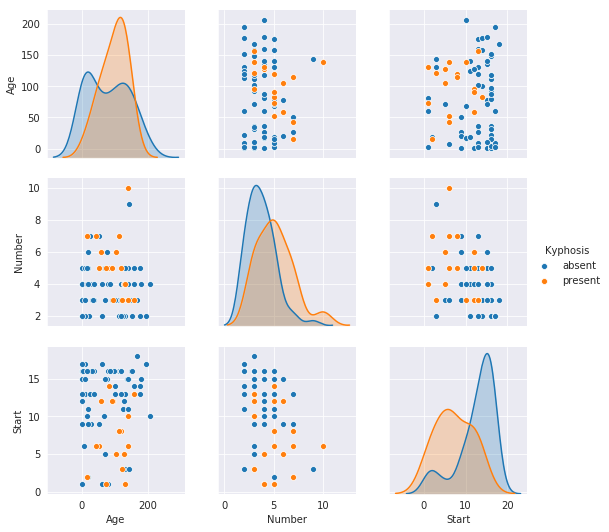

In [7]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='Kyphosis')

## Training and Testing the Decision Tree Model

In [8]:
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=101)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

   micro avg       0.56      0.56      0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [17]:
pd.DataFrame(confusion_matrix(y_test,predictions), 
             index=['absent','present'], columns=['absent','present'])

,absent,present
absent,12,5
present,6,2


The results are not very satisfying as you can see in the confution matrix with high rates of false-positives and false-negatives, and from the precision, recall and f1-scores.

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library. Here is an example of what it looks like and the code to execute this:

In [18]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

In [19]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

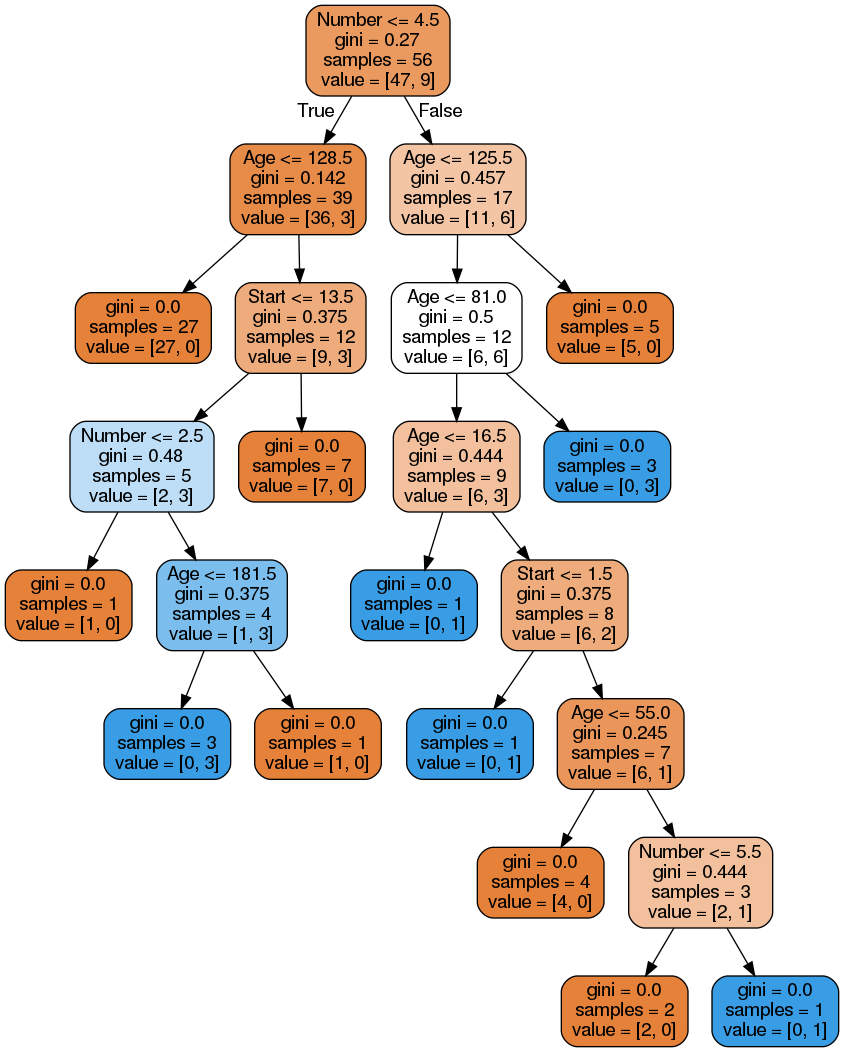

In [20]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Training and Testing the Random Forests Model
We now use the Random Forest approach and compare the results

## Bagging, Random Forests, Boosting

Bagging, random forests, and boosting use trees as building blocks to construct more powerful prediction models.

### Bagging

The _Bootstrap_ is a very powerful method that is used in many situations where it is hard to directly compute the standard deviation of a quantity of interest. It also can be used to improve statistical learning methods such as decision trees.

The decision trees suffer from _high variance_, meaning that if we spilt training data randomly, we will get quite different results. _Bootstrap aggregation_, or _bagging_ is a general-pupose procedure for reducing the variance of a statistical learning method. 

To apply bagging to regression trees, we simply construct $B$ regression trees using $B$ bootstrapped training sets, and average the resulting predictions. These trees are grown deep, and are not pruned. Hence each individual tree has high variance, but low bias. Averaging these B trees reduces the variance. Bagging has been demonstrated to give impressive improvements in accuracy by combining together hundreds or even thousands of trees into a single procedure. This procedure can be formulated as follows:

$$\hat{f}_{bag}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{*b}(x)$$

where, $\hat{f}^{*b}(x)$ is a prediction model trained on the $b$th bootstrapped training set.

__Note__: Bootstrapping refers to taking repeated samples from the (single) training data set to create $B$ different bootstrapped training data sets.

To apply bagging to classification trees, for a given test observation, we can record the class predicted by each of the $B$ trees, and take a _majority vote_: the overall prediction is the most commonly occurring class among the $B$ predictions.

#### Out-of-Bag Error Estimation
There is a straightforward way to estimate the test error of the bagged model without the need to perform cross-validation or validation set approach.

For bagging, the trees are repeatedly fit to bootstrapped subsets of the observations. Each bagged tree makes use of around two-thirds of the observations. The remaining one-third not used to fit the gaven bagged tree is referred to as _out-of-bag (OOB)_ observations.

We can predict the response for the $i$th observation using each of the trees in which that observation was OOB. This will yield around $B/3$ predictions for the $i$th observation. In order to obtain a single prediction for the $i$th observation, we can average these predicted responses (if regression is the goal) or can take a majority vote (if classification is the goal). This leads to a single OOB prediction for the ith observation.

The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.

#### Variable Importance Measure
When using bagging, it will be difficult to interpret the resulting model. However, we can obtain an overall summary of the importance of each predictor using the RSS (for bagging regression trees) or the Gini index (for bagging classification trees).

Therefore, we can record the total amount that the RSS/Gini Index is decreased due to splits over a given predictor, averaged over all B trees. A large value indicates an important predictor. 

## Random Forests
_Random forests_ provide an improvement over bagged trees by decorrelating the trees. Similar to bagginf, a number of decision trees are built on bootstrapped training samples. However, in this approach, at each split, _a random sample of m predictors_ is chosen and the split is allowed to choose only one of those $m$ predictiors.

This method, leads to reduce the tendecy of the trees to choose the most strong variable at the top of the tree which will result in creating similar trees. This process will decorrelate the trees, and therefore, the average of the resulting trees will be less variable and hence more reliable.

Using a small value of $m$ in building a random forest will typically be helpful when we have a large number of correlated predictors.


## Boosting
_Boosting_ is a general approach that can be applied to many statistical learning methods for regression or classification.

In boosting, trees are grown _sequentially_, meaning that each tree is grown using information from previousòy grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.

Instead of creating big trees, which probably lead to overfitting, the boosting approach tends to _learn slowly_. In this approach, we fit the model on the current residuals instead of the outcome $Y$, as the response. We then add this new decision tree into the fitted function in order to update the residuals. 

Boosting has three tuning parameters:

1. the number of trees $B$. We use cross validation to choose $B$. Large values for this parameter can lead to overfitting.

2. The shrinkage parameter $\lambda$ is a small positive number that controls the rate at which the boosting learns. Typically the values are $0.01$ or $0.001$. Very small $\lambda$  can require using a very large value of $B$ in order to achieve good performance.

3. The number $d$ of splits in each tree, which controls the complexity of the boosted ensemble. Often $d=1$ works well, which case each tree is a _stump_, consisting of a single split. More generally $d$ is the _interaction depth_, and controls the interaction order of the boosted model, since $d$ splits can involve at most $d$ variables.

In the following the algorithm for boosting:

<img src="../imgs/boosting.jpeg" width="500px"/>

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model= RandomForestClassifier(n_estimators=100)

In [23]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rf_predictions = rf_model.predict(X_test)

In [25]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

   micro avg       0.76      0.76      0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [26]:
pd.DataFrame(confusion_matrix(y_test,rf_predictions), 
             index=['absent','present'], columns=['absent','present'])

,absent,present
absent,17,0
present,6,2


Here we can see a considerable improvement on the performance of the model in terms of precision. However, as you can see, the recall for "present" result is pretty lower here while the overall recall has improved.

The reason for this can be found in the data. If we look at the data, we can see that the data is imbalanced as there are higher number of "absent" values for target rather than smaller portion of "present" values:

In [27]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In general, as data sets get larger, the Random Forest tends to out-perform the decision trees.

As discussed in the theory, we can see the feature importances to interpret the model. As it can be seen in the following, the Age feature have been the most important feature in this model:

In [28]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Feature Importance'])

,Feature Importance
Age,0.429574
Number,0.215755
Start,0.354671
